# 使用 迴歸 預測台股股價

## 安裝套件

In [10]:
!pip install yfinance -U
!conda install -c conda-forge ta-lib

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.51
    Uninstalling yfinance-0.2.51:
      Successfully uninstalled yfinance-0.2.51


## 載入相關套件

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
import talib
from datetime import datetime as dt
import pytz

## 載入資料集

In [4]:
# tz = pytz.timezone("Asia/Taipei")
# START_DATE = tz.localize(dt(2020,1,1))
# END_DATE = tz.localize(dt(2024,12,31))
START_DATE = '2020-01-01'
END_DATE = '2024-12-31'
CLOSE_FIELD_NAME = 'Close'
df = yf.download('2317.TW', START_DATE, END_DATE)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,2317.TW,2317.TW,2317.TW,2317.TW,2317.TW
Date,,,,,
2024-12-17,183.0,186.0,181.0,181.0,54107138
2024-12-18,184.5,185.5,182.5,183.0,46803571
2024-12-19,181.0,182.0,179.0,181.0,62303203
2024-12-20,181.0,184.0,180.0,181.0,55158347
2024-12-23,185.5,187.5,184.0,185.0,50507684
2024-12-24,185.5,187.5,185.5,187.5,32584682
2024-12-25,186.5,188.0,186.0,186.5,21198608
2024-12-26,187.5,189.0,187.0,187.5,35581123


## 資料轉換

In [5]:
df.columns = [item[0] for item in df.columns]
df.tail(10)

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-17,183.0,186.0,181.0,181.0,54107138
2024-12-18,184.5,185.5,182.5,183.0,46803571
2024-12-19,181.0,182.0,179.0,181.0,62303203
2024-12-20,181.0,184.0,180.0,181.0,55158347
2024-12-23,185.5,187.5,184.0,185.0,50507684
2024-12-24,185.5,187.5,185.5,187.5,32584682
2024-12-25,186.5,188.0,186.0,186.5,21198608
2024-12-26,187.5,189.0,187.0,187.5,35581123
2024-12-27,186.5,188.0,185.5,187.5,20870917


In [6]:
# 移動平均月線
df['SMA_5'] = talib.SMA(df['Close'].values.reshape(-1), timeperiod=5)
df['SMA_20'] = talib.SMA(df['Close'].values.reshape(-1), timeperiod=22)
df['SMA_60'] = talib.SMA(df['Close'].values.reshape(-1), timeperiod=60)
# RSI
df['RSI'] = talib.RSI(df.Close.values.reshape(-1), timeperiod=14)
# MACD
real = talib.DX(df.High.values.reshape(-1), df.Low.values.reshape(-1), 
                df.Close.values.reshape(-1), timeperiod=14)
df['MACD'], df['Signal'], _ = talib.MACD(real, fastperiod=12, slowperiod=26, signalperiod=9)

<Axes: xlabel='Date'>

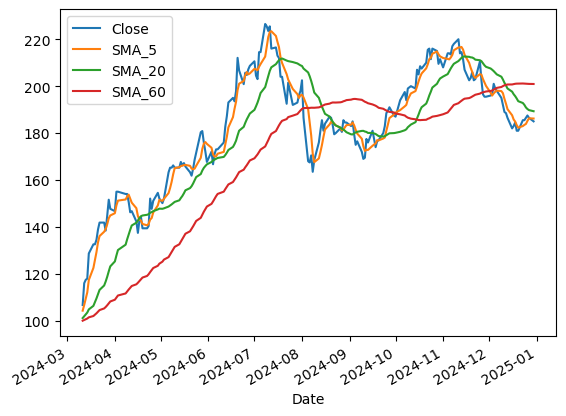

In [11]:
df[['Close', 'SMA_5', 'SMA_20', 'SMA_60']].iloc[-200:].plot(kind='line')